# Chapter 2. End-to-End Machine Learning Project


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../datasets/housing/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


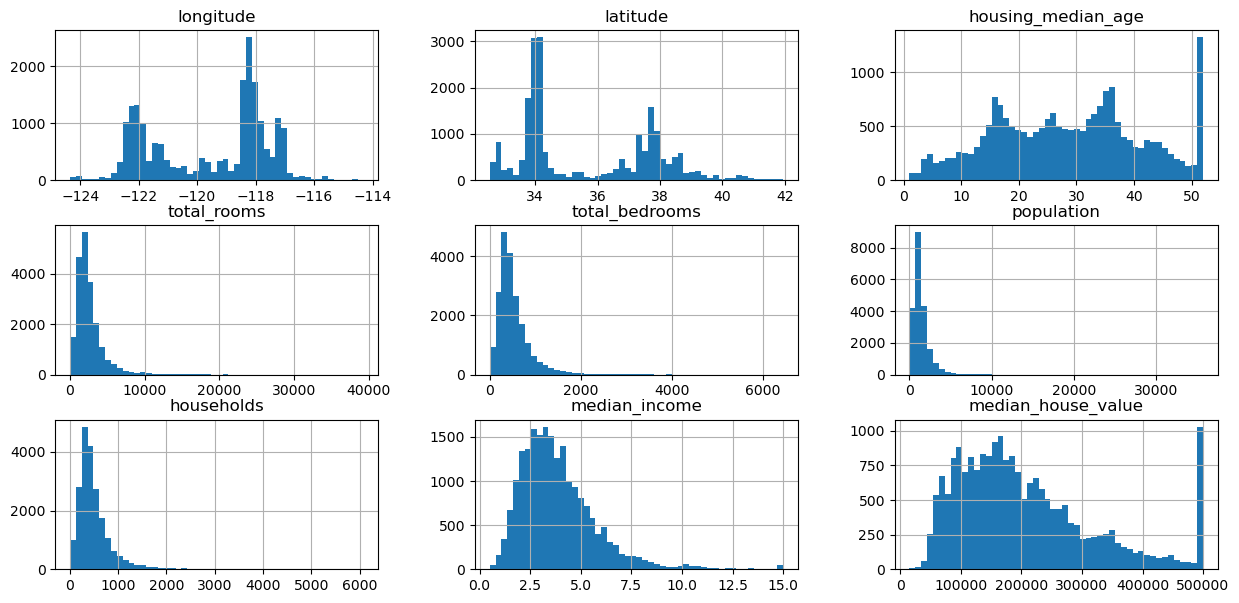

In [6]:
df.hist(bins=50, figsize=[15,7]);

In [7]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
print("_"*50)
print("Dimension of the Train Sample Set: ", train_set.shape)
print("_"*50)
print("Dimension of the Test Sample Set: ", test_set.shape)
print("_"*50)

__________________________________________________
Dimension of the Train Sample Set:  (16512, 10)
__________________________________________________
Dimension of the Test Sample Set:  (4128, 10)
__________________________________________________


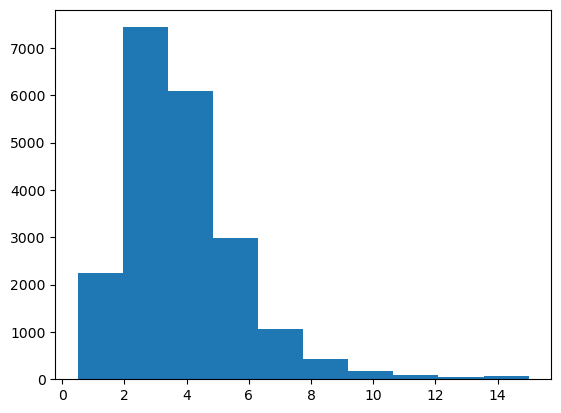

In [10]:
plt.hist(df["median_income"]);

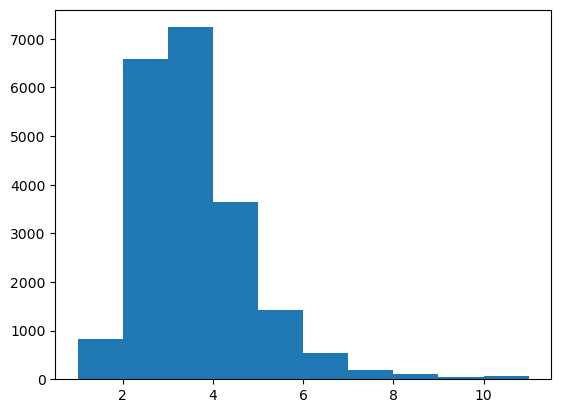

In [11]:
plt.hist(np.ceil(df["median_income"]/ 1.5));

In [12]:
bins = [0., 1.5, 3., 4.5, 6.0, np.inf]
labels = [1, 2, 3, 4, 5]
df["income_cat"] = pd.cut(df["median_income"], bins=bins, labels=labels)

In [13]:
df["income_cat"].unique()

[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<Axes: xlabel='income_cat', ylabel='count'>

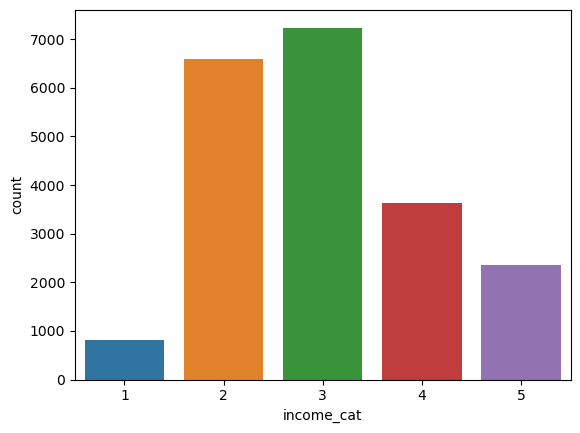

In [14]:
sns.countplot(df, x="income_cat")

In [15]:
df["income_cat"].value_counts(normalize=True)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
random_train_set, random_train_split = train_test_split(df, test_size=0.2, random_state=42)
strat_train, strat_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["income_cat"])




sample_test_df = pd.DataFrame(
    {
    "sample_population": df["income_cat"].value_counts(normalize=True),
    "random_sample_split": random_train_set["income_cat"].value_counts(normalize=True),
    "stratified_sample_split": strat_train["income_cat"].value_counts(normalize=True)
    }
)

sample_test_df    

,sample_population,random_sample_split,stratified_sample_split
3,0.350581,0.348595,0.350594
2,0.318847,0.317466,0.318859
4,0.176308,0.178537,0.176296
5,0.114438,0.115673,0.114462
1,0.039826,0.039729,0.039789


In [17]:
strat_train.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
11610,-118.05,33.78,25.0,2356.0,330.0,937.0,326.0,6.6264,359100.0,<1H OCEAN,5
3675,-118.39,34.21,32.0,1869.0,441.0,1516.0,432.0,3.6845,178500.0,<1H OCEAN,3
18526,-122.04,36.97,52.0,1901.0,335.0,955.0,301.0,3.8259,253100.0,NEAR OCEAN,3


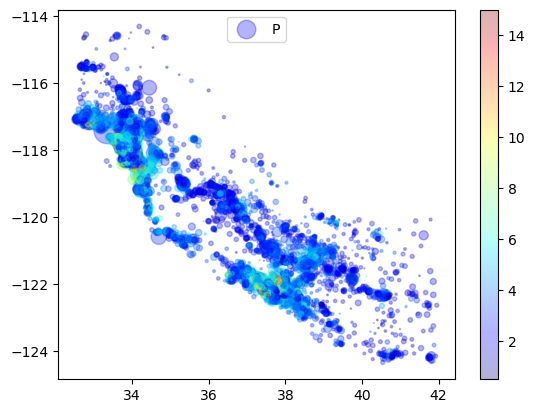

In [18]:
plt.scatter(
    data=strat_train,
    x="latitude",
    y="longitude",
    alpha=0.3,
    s=strat_train["population"]/100,
    c="median_income",
    cmap=plt.get_cmap("jet")
)

plt.colorbar()
plt.legend("Population", loc="upper center");

## Feature Engineering

In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [20]:
df.corrwith(df["median_house_value"], numeric_only=True)

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
dtype: float64

In [21]:
df["population_per_household"] = df["population"] / df["households"]
df["bedrooms_per_rooms"] = df["total_bedrooms"] / df["total_rooms"]
df["rooms_per_household"] = df["total_rooms"] / df["households"]

In [22]:
df.corrwith(df["median_house_value"], numeric_only=True).sort_values()

bedrooms_per_rooms         -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
dtype: float64

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
median_imputer = SimpleImputer(strategy="median")

In [25]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
population_per_household      0
bedrooms_per_rooms          207
rooms_per_household           0
dtype: int64

In [26]:
housing_num = df.drop(columns="ocean_proximity")
median_imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
median_imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  2.81811565e+00,  2.03162434e-01,
        5.22912879e+00])

In [28]:
pd.Series(data=median_imputer.statistics_, index=housing_num.columns)

longitude                     -118.490000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2127.000000
total_bedrooms                 435.000000
population                    1166.000000
households                     409.000000
median_income                    3.534800
median_house_value          179700.000000
income_cat                       3.000000
population_per_household         2.818116
bedrooms_per_rooms               0.203162
rooms_per_household              5.229129
dtype: float64

In [29]:
housing_num.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20433.0,537.870553,421.385070,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000
population_per_household,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333


## Work with Categorical Columns

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,population_per_household,bedrooms_per_rooms,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,2.555556,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,2.109842,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,2.802260,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,2.547945,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,2.181467,0.172096,6.281853


In [31]:
house_cat = df["ocean_proximity"].copy()

In [32]:
house_cat.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [68]:
encoder = LabelEncoder()
house_encoder = encoder.fit_transform(house_cat)

In [69]:
encoder.inverse_transform(house_encoder)

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [70]:
house_encoder

array([3, 3, 3, ..., 1, 1, 1])

In [71]:
hot_encoder = OneHotEncoder()
house_hot_encode = hot_encoder.fit_transform(np.array(house_cat).reshape(-1, 1))

In [73]:
house_hot_encode.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [78]:
house_cat

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [77]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Building Custom estimator_transformer

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

In [79]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,population_per_household,bedrooms_per_rooms,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,2.555556,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,2.109842,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,2.802260,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,2.547945,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,2.181467,0.172096,6.281853
